In [36]:
#Pablo Sebastián Herrera
#Jose Luis Solorzano
#Lab 1. Time Series Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.tsa as tsa
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Análisis Exploratorio de los Datos

In [2]:
#lectura de datos
df_importaciones = pd.read_excel("Estadisticas.xlsx",sheet_name = "IMPORTACION")
df_consumo = pd.read_excel("Estadisticas.xlsx",sheet_name = "CONSUMO")

df_importaciones.columns

Index(['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas',
       'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido',
       'Total importación'],
      dtype='object')

In [3]:
columns = ["Fecha", "Gasolina regular","Gasolina superior","Diesel alto azufre",]
importaciones = df_importaciones[columns].copy()
consumo = df_consumo[columns].copy()

importaciones.head(5)

,Fecha,Gasolina regular,Gasolina superior,Diesel alto azufre
0,2001-01-01,177776.50,373963.96,566101.99
1,2001-02-01,123115.99,243091.07,489525.80
2,2001-03-01,161726.42,312084.38,575559.68
3,2001-04-01,127338.74,285054.89,437745.42
4,2001-05-01,168730.19,300913.67,552609.13


In [4]:
print(f"Cantidad de variables :{importaciones.shape[1]}")
print("-"*100)
print(f"Cantidad datos en Importaciones: {importaciones.shape[0]}")
print(f"Cantidad datos en Consumo: {consumo.shape[0]}")


Cantidad de variables :4
----------------------------------------------------------------------------------------------------
Cantidad datos en Importaciones: 288
Cantidad datos en Consumo: 300


In [5]:
print(f"Tipos de variables:\n{importaciones.dtypes}")

Tipos de variables:
Fecha                 datetime64[ns]
Gasolina regular             float64
Gasolina superior            float64
Diesel alto azufre           float64
dtype: object


In [6]:
print(f"Variables nulas o vacías en importaciones:\n{importaciones.isnull().sum()}")
print("-"*100)
print(f"Variables nulas o vacías en consumo:\n{consumo.isnull().sum()}")

Variables nulas o vacías en importaciones:
Fecha                 0
Gasolina regular      0
Gasolina superior     0
Diesel alto azufre    0
dtype: int64
----------------------------------------------------------------------------------------------------
Variables nulas o vacías en consumo:
Fecha                 0
Gasolina regular      0
Gasolina superior     0
Diesel alto azufre    0
dtype: int64


In [7]:
print(f"Estadisticas Descriptivas Importaciones:\n{importaciones[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].describe()}")
print("-"*100)
print(f"Estadisticas Descriptivas Consumo:\n{consumo[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].describe()}")

Estadisticas Descriptivas Importaciones:
       Gasolina regular  Gasolina superior  Diesel alto azufre
count      2.880000e+02       2.880000e+02        2.880000e+02
mean       4.129493e+05       4.909544e+05        5.541217e+05
std        2.432627e+05       1.565581e+05        4.097571e+05
min        8.101530e+04       1.702925e+05        0.000000e+00
25%        2.082069e+05       3.693299e+05        0.000000e+00
50%        3.275593e+05       4.813002e+05        6.380928e+05
75%        5.761171e+05       6.083053e+05        8.447706e+05
max        1.141366e+06       1.227174e+06        1.595699e+06
----------------------------------------------------------------------------------------------------
Estadisticas Descriptivas Consumo:
       Gasolina regular  Gasolina superior  Diesel alto azufre
count        300.000000         300.000000        3.000000e+02
mean      397478.894458      470248.678849        5.144313e+05
std       219102.049432      113504.653305        3.688977e+05
min 

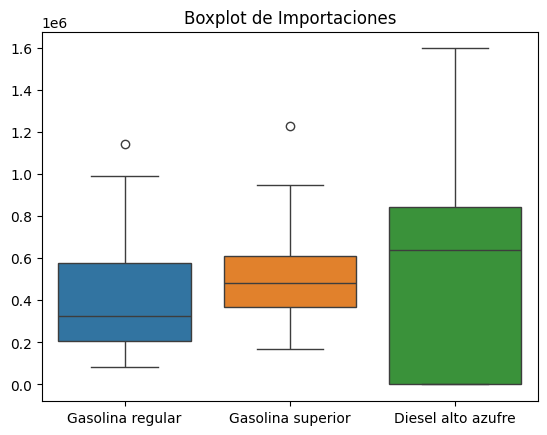

In [8]:
sns.boxplot(data=importaciones[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']])
plt.title("Boxplot de Importaciones")
plt.show()  

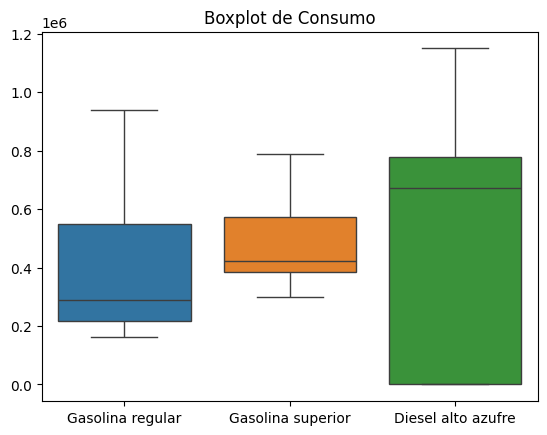

In [9]:
sns.boxplot(data=consumo[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']])
plt.title("Boxplot de Consumo")
plt.show() 

In [10]:
print(f"Cantidad de datos duplicados en importaciones: {importaciones.duplicated().sum()}")
print(f"Cantidad de datos duplicados en consumo: {consumo.duplicated().sum()}")

Cantidad de datos duplicados en importaciones: 0
Cantidad de datos duplicados en consumo: 0


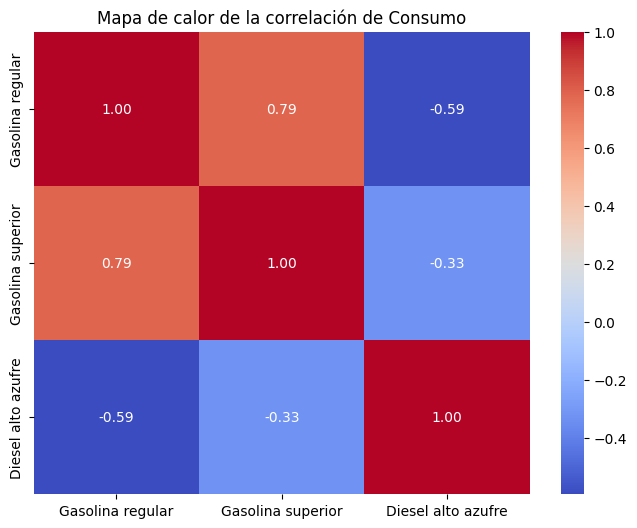

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    importaciones[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].corr(), 
    annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de la correlación de Consumo")
plt.show()


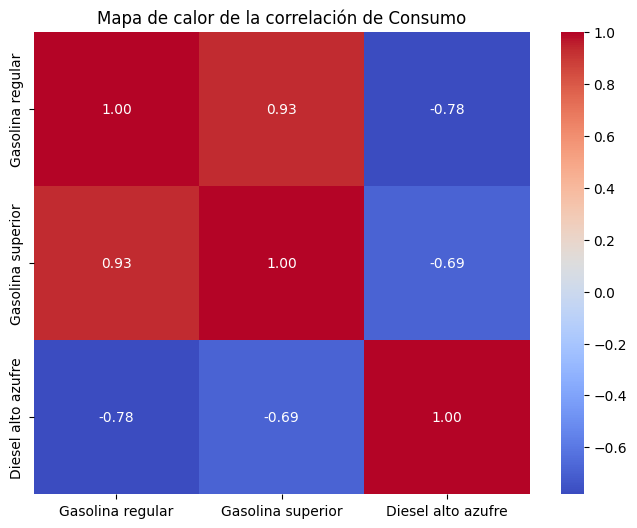

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    consumo[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].corr(), 
    annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de la correlación de Consumo")
plt.show()


In [13]:
totales_importaciones = importaciones[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].sum()
totales_consumo = consumo[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].sum()


In [14]:
print(f"Importaciones hidrocarburos a lo largo de los años:\n{totales_importaciones}")
print("-"*100)
print(f"Consumo hidrocarburos a lo largo de los años:\n{totales_consumo}")

Importaciones hidrocarburos a lo largo de los años:
Gasolina regular      1.189294e+08
Gasolina superior     1.413949e+08
Diesel alto azufre    1.595871e+08
dtype: float64
----------------------------------------------------------------------------------------------------
Consumo hidrocarburos a lo largo de los años:
Gasolina regular      1.192437e+08
Gasolina superior     1.410746e+08
Diesel alto azufre    1.543294e+08
dtype: float64


<Figure size 1000x600 with 0 Axes>

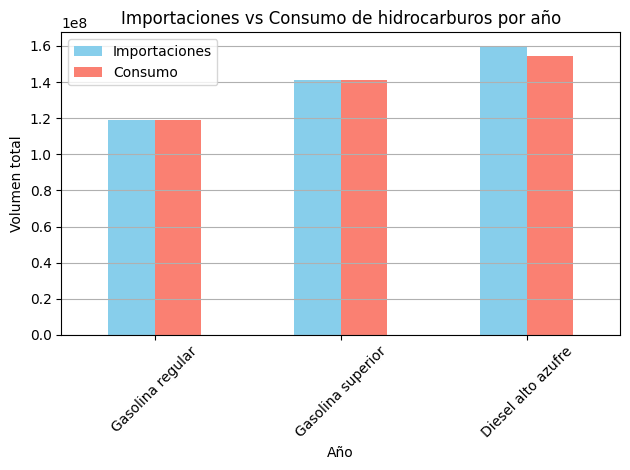

In [15]:
df_comparado = pd.DataFrame({
    'Importaciones': totales_importaciones,
    'Consumo': totales_consumo
})

# Crear gráfico combinado
plt.figure(figsize=(10, 6))
df_comparado.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Importaciones vs Consumo de hidrocarburos por año")
plt.ylabel("Volumen total")
plt.xlabel("Año")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.grid(axis='y')
plt.show()



In [16]:
importaciones['Año'] = importaciones['Fecha'].dt.year
importaciones['Mes'] = importaciones['Fecha'].dt.month
consumo['Año'] = consumo['Fecha'].dt.year
consumo['Mes'] = consumo['Fecha'].dt.month

# Productos a analizar
productos = ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']

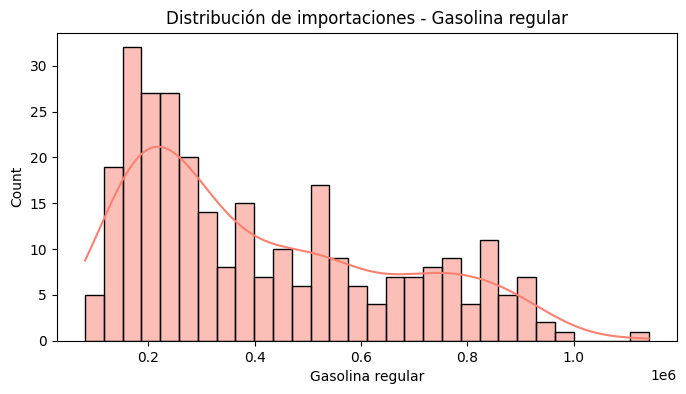

Gasolina regular: p-valor normaltest = 0.0000
→ No se distribuye normalmente.


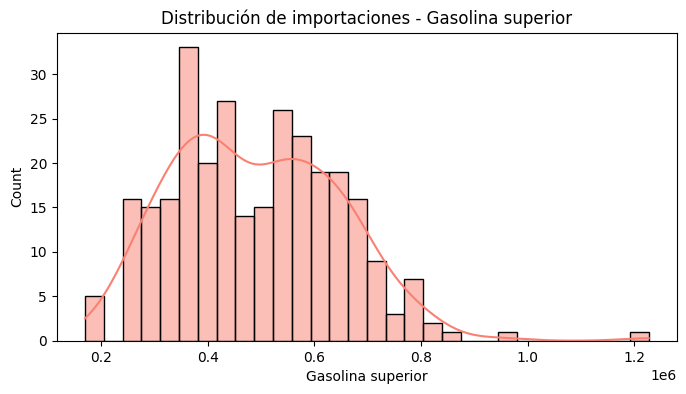

Gasolina superior: p-valor normaltest = 0.0003
→ No se distribuye normalmente.


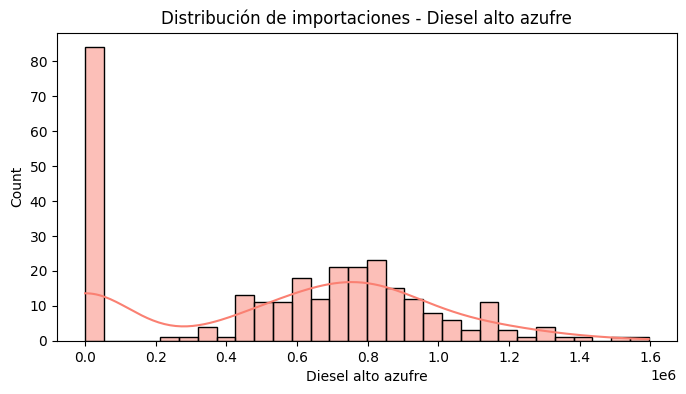

Diesel alto azufre: p-valor normaltest = 0.0000
→ No se distribuye normalmente.


In [17]:
for producto in productos:
    plt.figure(figsize=(8, 4))
    sns.histplot(importaciones[producto].dropna(), kde=True, bins=30,color="salmon")
    plt.title(f'Distribución de importaciones - {producto}')
    plt.show()

    stat, p = normaltest(importaciones[producto].dropna())
    print(f"{producto}: p-valor normaltest = {p:.4f}")
    if p < 0.05:
        print("→ No se distribuye normalmente.")
    else:
        print("→ Puede considerarse normal.")


<Figure size 1000x500 with 0 Axes>

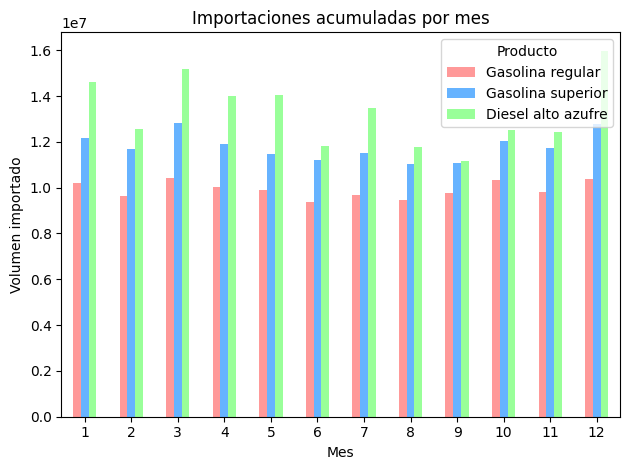

In [18]:
mensual = importaciones.groupby('Mes')[productos].sum()

plt.figure(figsize=(10, 5))
mensual.plot(kind='bar',color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title("Importaciones acumuladas por mes")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.xticks(rotation=0)
plt.legend(title='Producto')
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

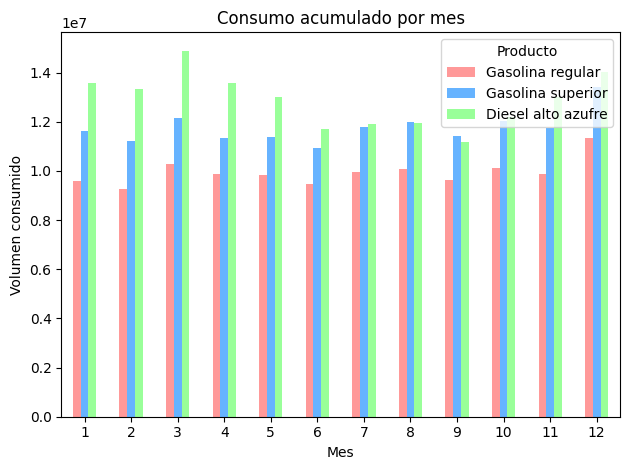

In [19]:
mensual = consumo.groupby('Mes')[productos].sum()

plt.figure(figsize=(10, 5))
mensual.plot(kind='bar', color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title("Consumo acumulado por mes")
plt.xlabel("Mes")
plt.ylabel("Volumen consumido")
plt.xticks(rotation=0)
plt.legend(title='Producto')
plt.tight_layout()
plt.show()


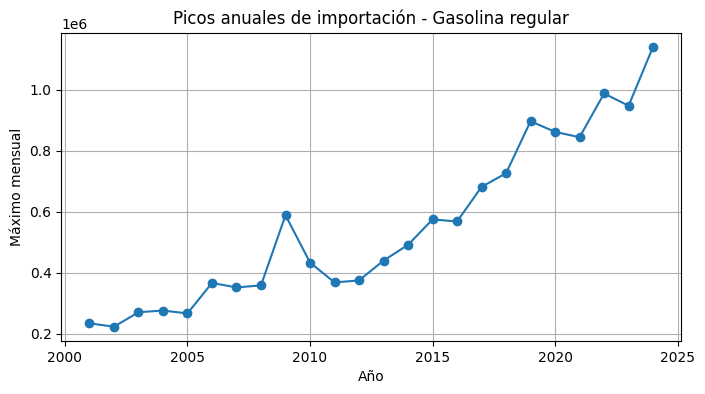

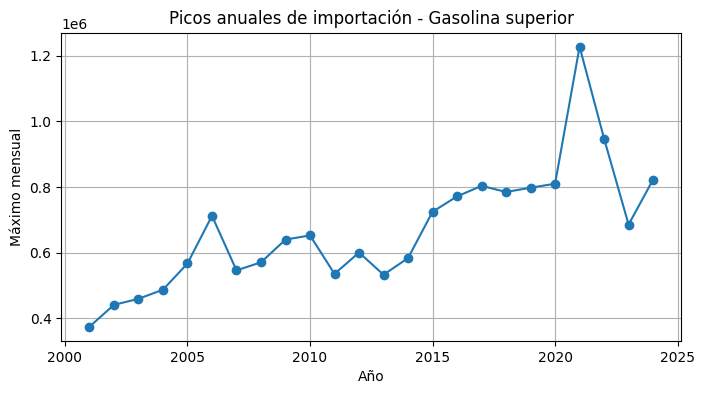

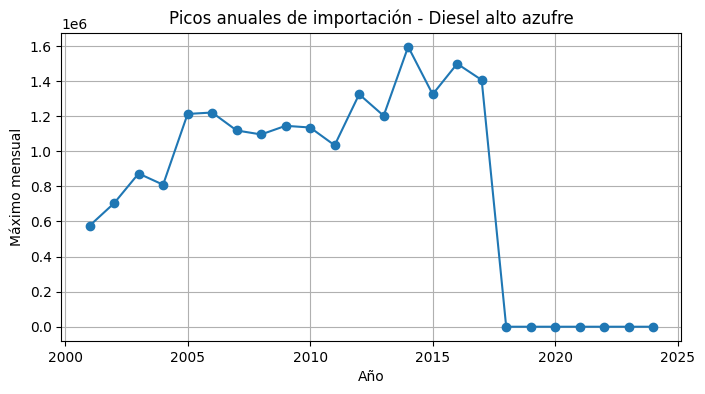

In [20]:
for producto in productos:
    anual = importaciones.groupby('Año')[producto].max()
    plt.figure(figsize=(8, 4))
    anual.plot(marker='o')
    plt.title(f'Picos anuales de importación - {producto}')
    plt.xlabel("Año")
    plt.ylabel("Máximo mensual")
    plt.grid(True)
    plt.show()


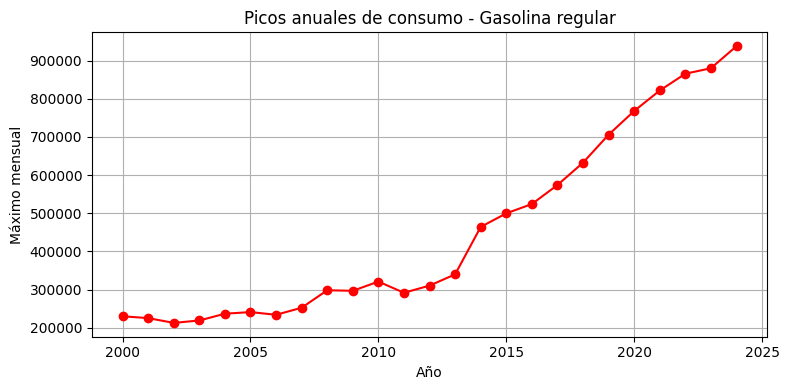

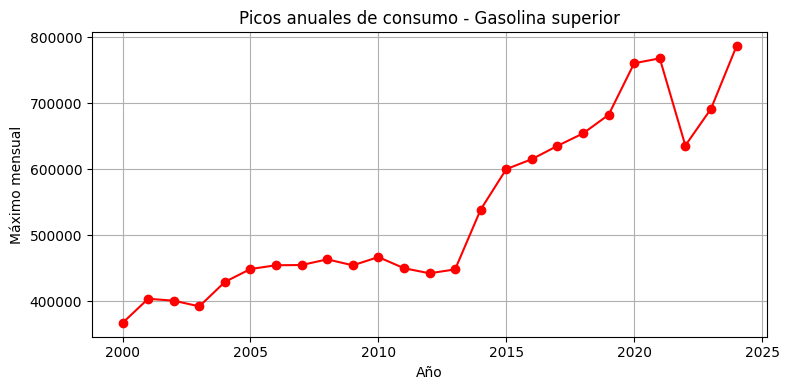

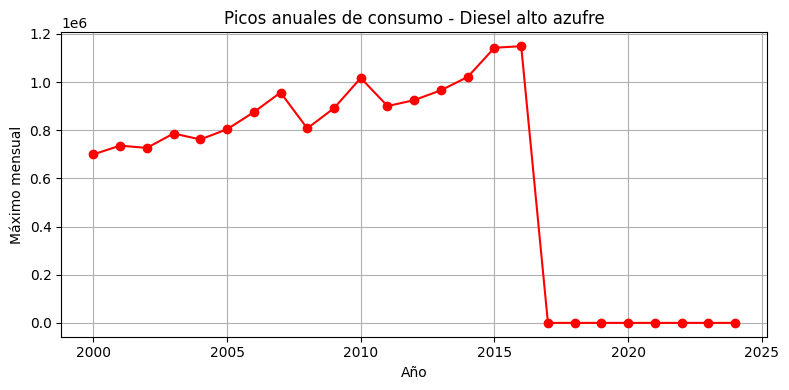

In [21]:
for producto in productos:
    anual = consumo.groupby('Año')[producto].max()
    plt.figure(figsize=(8, 4))
    anual.plot(marker='o', color='red')  # El color va aquí
    plt.title(f'Picos anuales de consumo - {producto}')
    plt.xlabel("Año")
    plt.ylabel("Máximo mensual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


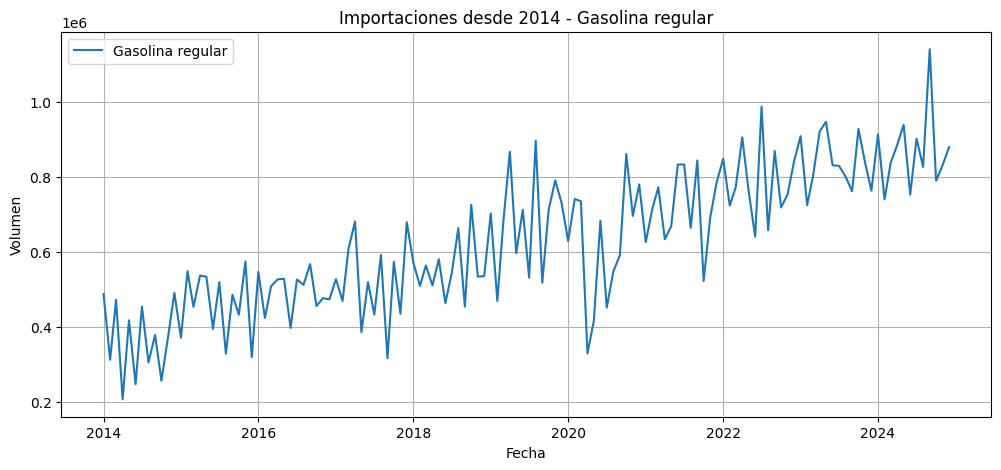

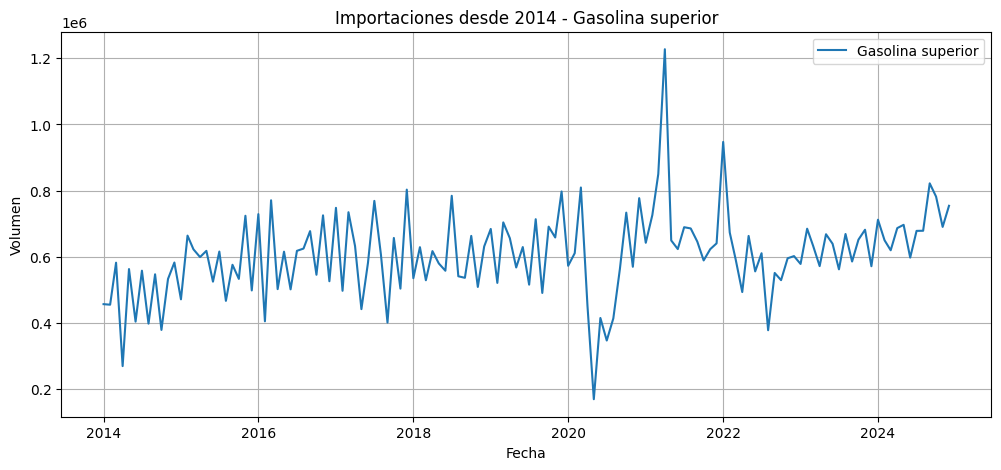

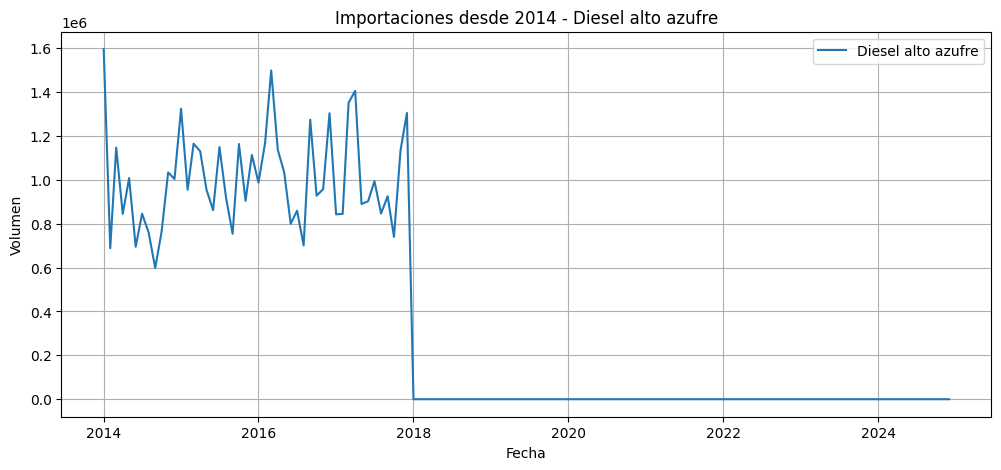

In [22]:
desde = 2014
reciente = importaciones[importaciones['Año'] >= desde]

for producto in productos:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=reciente, x='Fecha', y=producto, label=producto)
    plt.title(f'Importaciones desde {desde} - {producto}')
    plt.xlabel("Fecha")
    plt.ylabel("Volumen")
    plt.grid(True)
    plt.show()


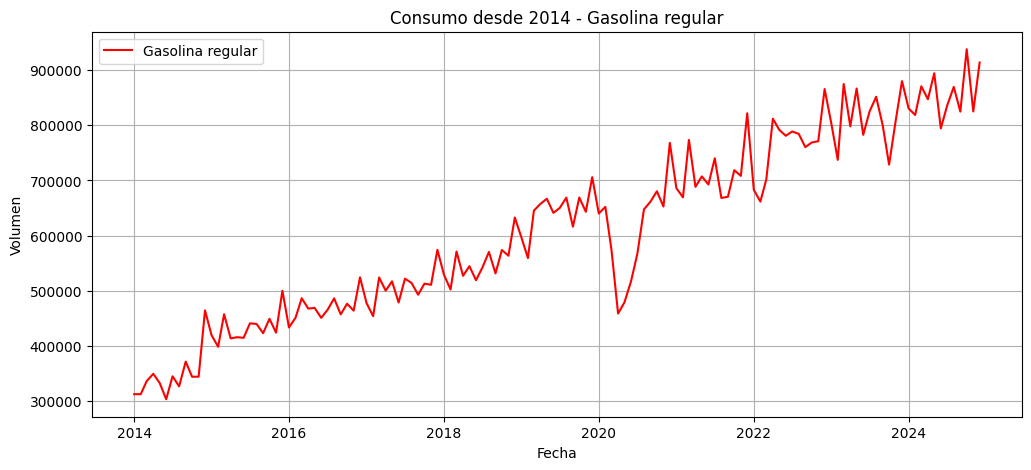

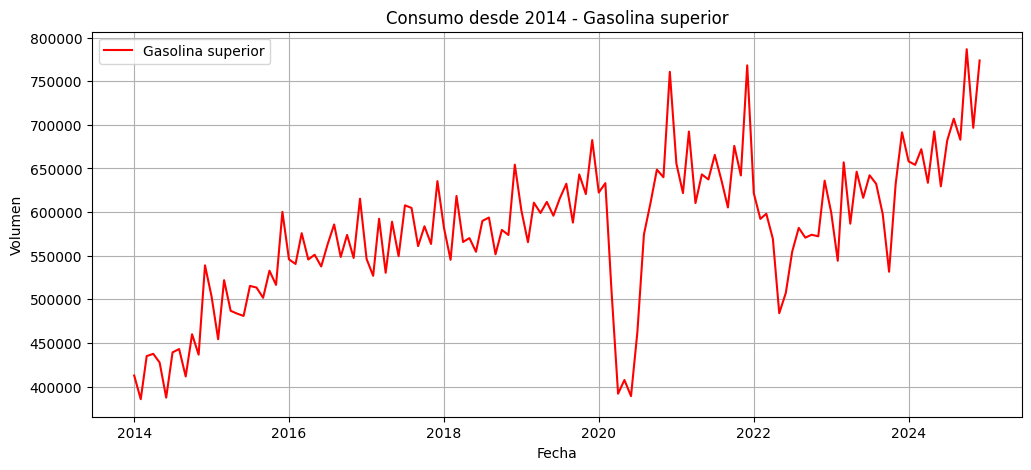

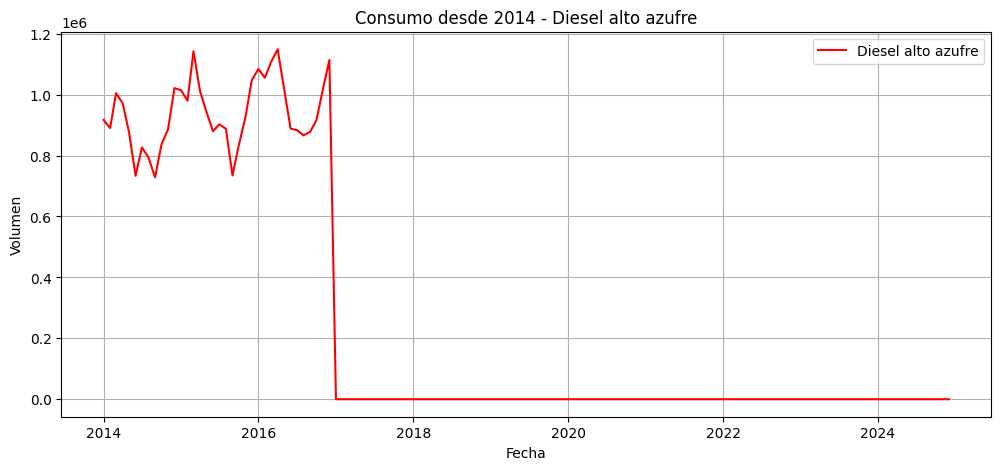

In [23]:
desde = 2014
reciente = consumo[consumo['Año'] >= desde]

for producto in productos:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=reciente, x='Fecha', y=producto, label=producto,color="red")
    plt.title(f'Consumo desde {desde} - {producto}')
    plt.xlabel("Fecha")
    plt.ylabel("Volumen")
    plt.grid(True)
    plt.show()


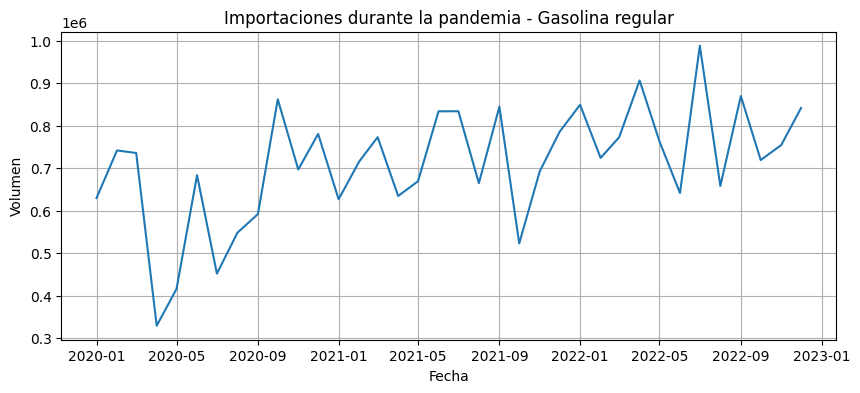

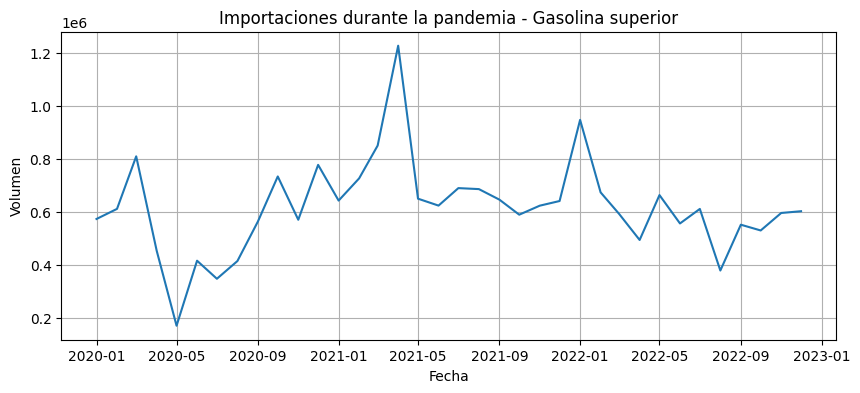

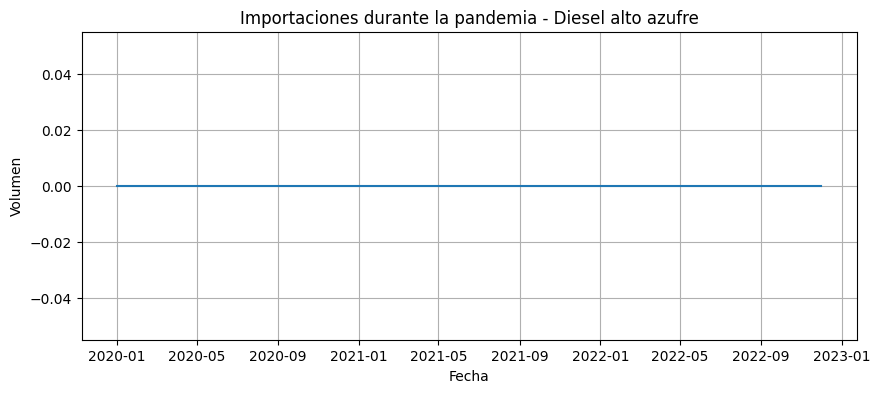

In [24]:
pandemia = importaciones[(importaciones['Año'] >= 2020) & (importaciones['Año'] <= 2022)]

for producto in productos:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=pandemia, x='Fecha', y=producto)
    plt.title(f'Importaciones durante la pandemia - {producto}')
    plt.xlabel("Fecha")
    plt.ylabel("Volumen")
    plt.grid(True)
    plt.show()


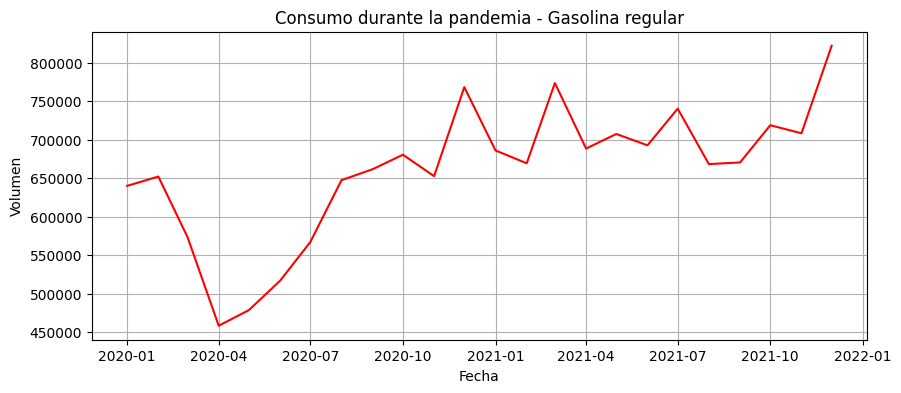

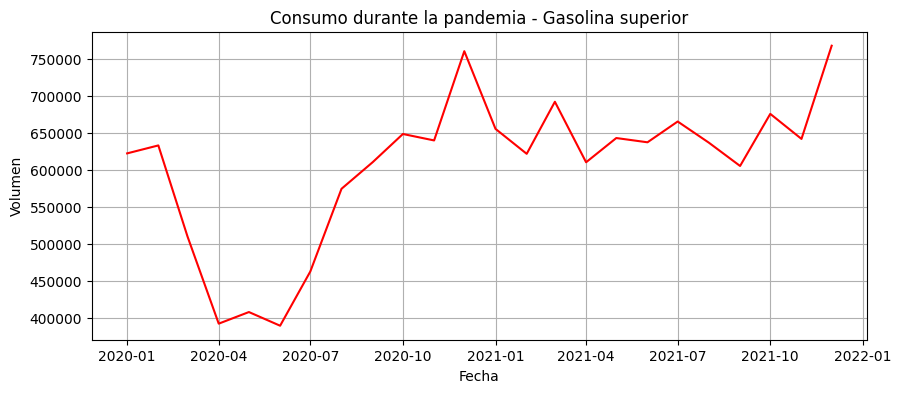

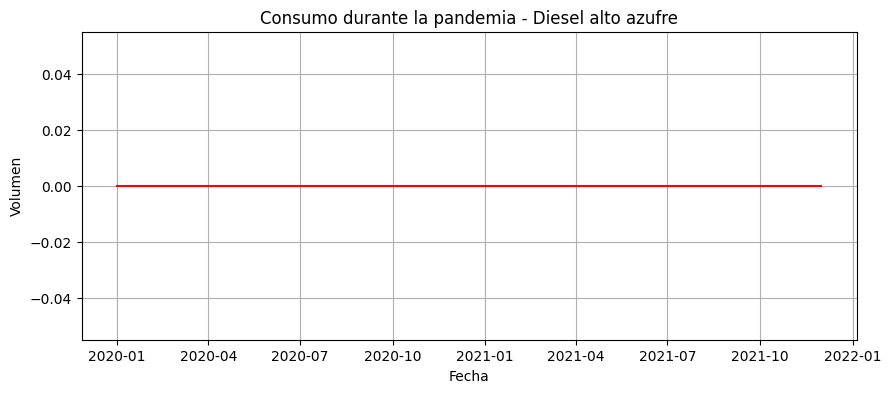

In [25]:
pandemia = consumo[(consumo['Año'] >= 2020) & (importaciones['Año'] <= 2022)]

for producto in productos:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=pandemia, x='Fecha', y=producto,color="red")
    plt.title(f'Consumo durante la pandemia - {producto}')
    plt.xlabel("Fecha")
    plt.ylabel("Volumen")
    plt.grid(True)
    plt.show()


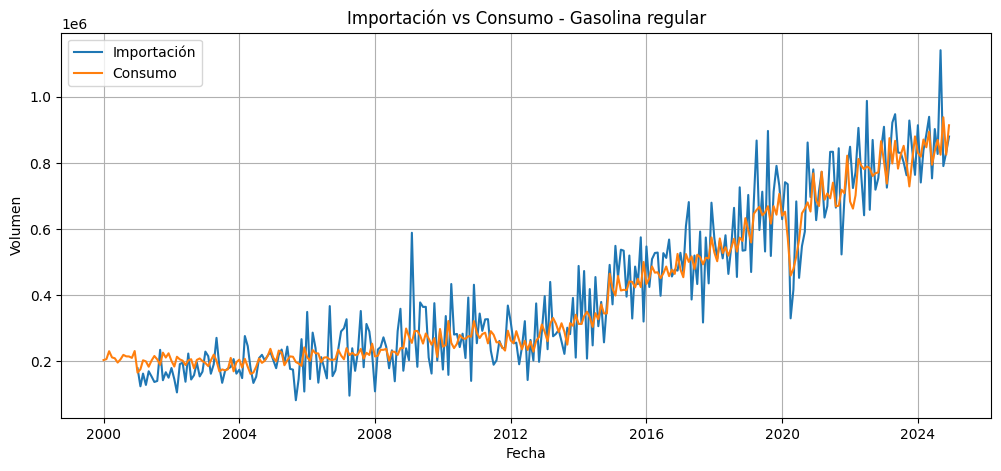

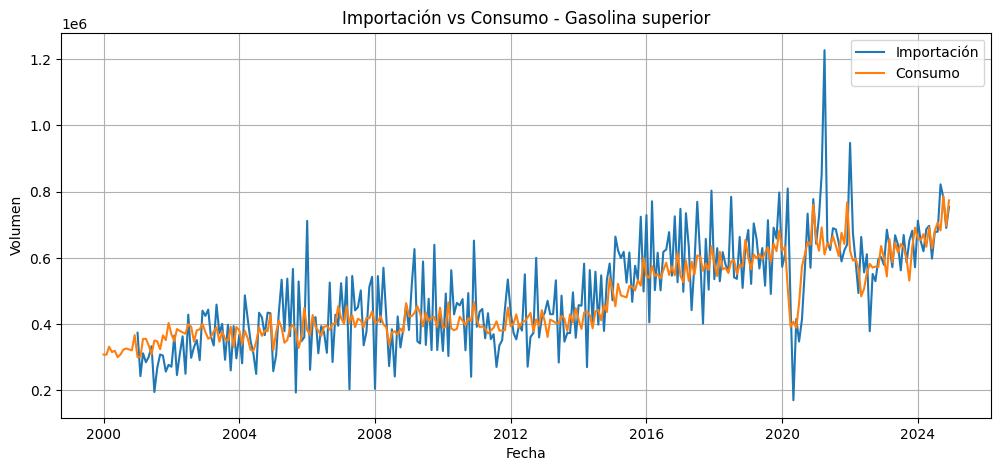

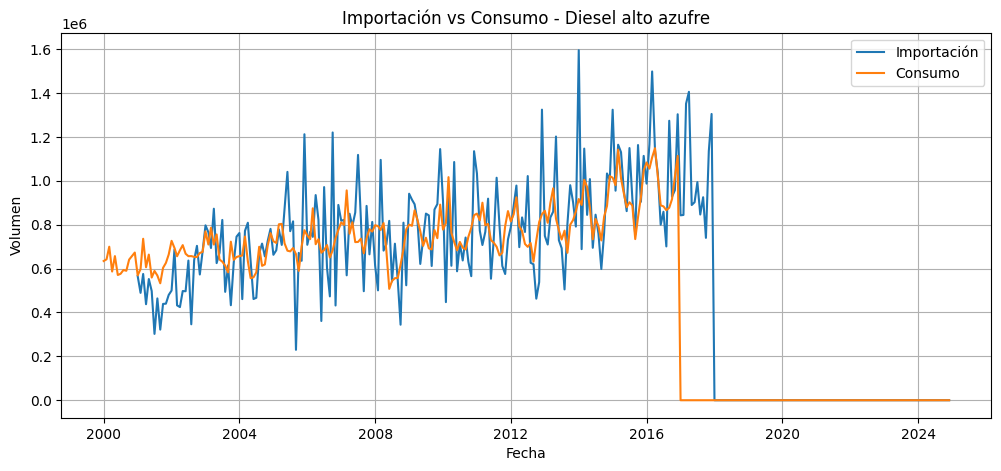

In [26]:
for producto in productos:
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=importaciones, x='Fecha', y=producto, label='Importación')
    sns.lineplot(data=consumo, x='Fecha', y=producto, label='Consumo')
    plt.title(f'Importación vs Consumo - {producto}')
    plt.xlabel("Fecha")
    plt.ylabel("Volumen")
    plt.legend()
    plt.grid(True)
    plt.show()


# Análisis Series Temporales

In [27]:
importaciones_regular_ts = importaciones[["Fecha", "Gasolina regular"]].copy()
importaciones_regular_ts.set_index('Fecha', inplace=True)
importaciones_super_ts = importaciones[["Fecha", "Gasolina superior"]].copy()
importaciones_super_ts.set_index('Fecha', inplace=True)
importaciones_diesel_ts = importaciones[["Fecha", "Diesel alto azufre"]].copy()
importaciones_diesel_ts.set_index('Fecha', inplace=True)

consumos_regular_ts = consumo[["Fecha", "Gasolina regular"]].copy()
consumos_regular_ts.set_index('Fecha', inplace=True)
consumos_super_ts = consumo[["Fecha", "Gasolina superior"]].copy()          
consumos_super_ts.set_index('Fecha', inplace=True)
consumos_diesel_ts = consumo[["Fecha", "Diesel alto azufre"]].copy()
consumos_diesel_ts.set_index('Fecha', inplace=True)

## Gasolina Regular 
### Importaciones


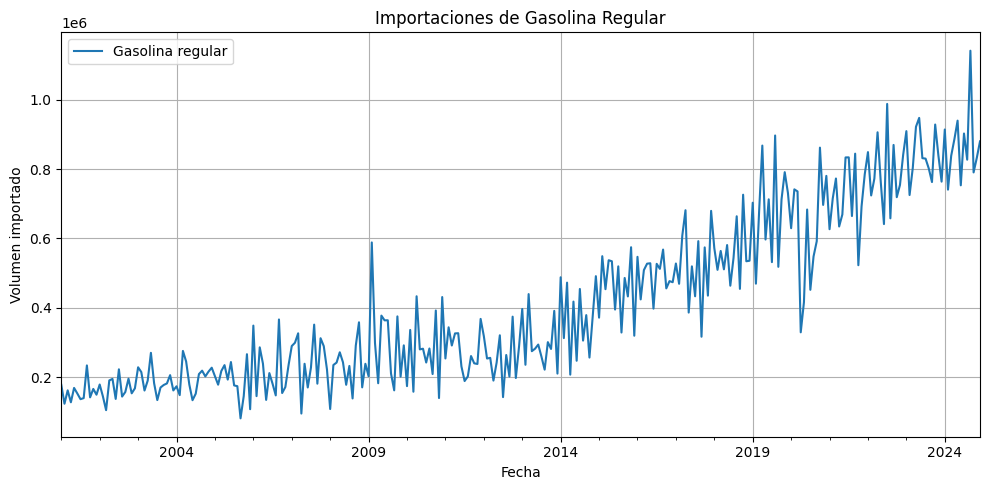

In [28]:
importaciones_regular_ts.plot(figsize=(10, 5), title='Importaciones de Gasolina Regular')
plt.xlabel("Fecha")
plt.ylabel("Volumen importado")
plt.grid(True)
plt.tight_layout()
plt.show()

Para comenzar se ha decidido examinar la serie temporal de las importaciones de gasolina regular. Al observar la gráfica lo primero que se puede observar es una tendecia al alza a lo largo del tiempo. 

La serie presenta una gran cantidad de datos con varios picos, lo que hace difícil identificar patrones de estacionalidad. Por lo que será necesario un análisis más a profundidad para ideniticar esto.

Además, dada la gráfica se puede suponer de cierta manera la falta de estacionariedad. Viendo la gráfica se puede intuir que las propiedades estadísticas parecen cambiar con el tiempo, especialmente considerando esa tendencia creciente que se mencionó anteriormente. Claramente es solo una intuición y se profundizará más adelante. 

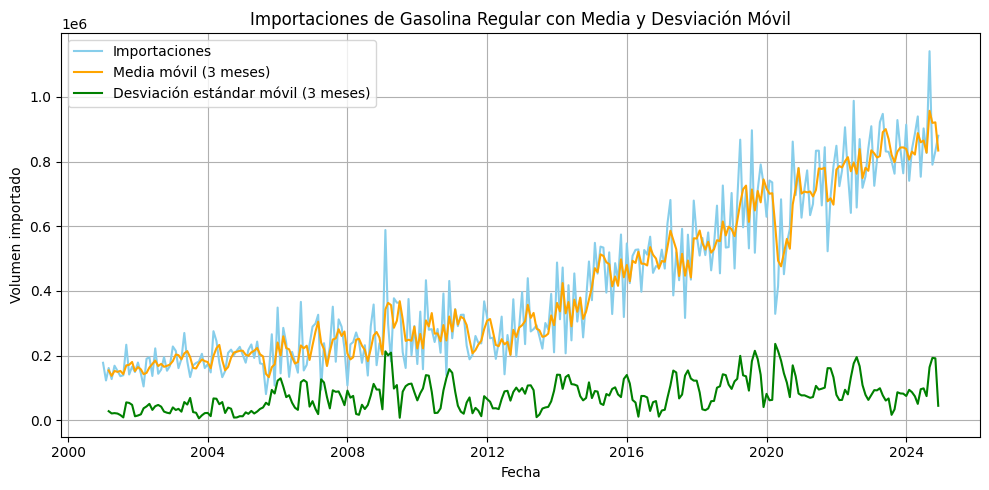

In [29]:
media_movil = importaciones_regular_ts.rolling(window=3).mean()
desviacion_movil = importaciones_regular_ts.rolling(window=3).std()

plt.figure(figsize=(10, 5))
plt.plot(importaciones_regular_ts, label='Importaciones', color='skyblue')
plt.plot(media_movil, label='Media móvil (3 meses)', color='orange')
plt.plot(desviacion_movil, label='Desviación estándar móvil (3 meses)', color='green')

plt.title('Importaciones de Gasolina Regular con Media y Desviación Móvil')
plt.xlabel('Fecha')
plt.ylabel('Volumen importado')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


En esta gráfica se tiene tanto la media como al desviación estándar móvil de la serie. Es evidente que estas no se mantienen constante a lo largo del tiempo, reforzando la idea de que la serie no es estacionaria. 

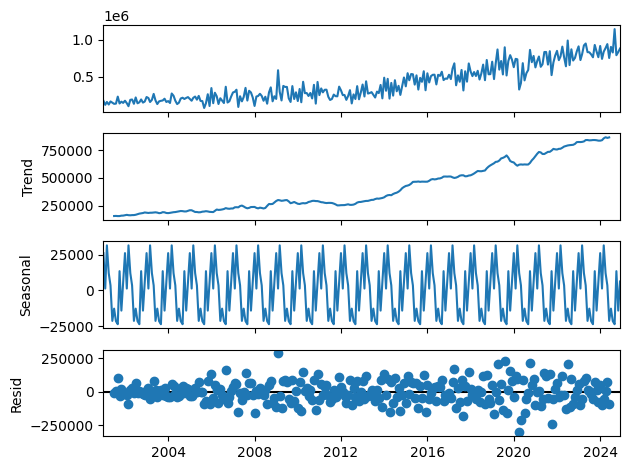

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie de tiempo
descomposicion = seasonal_decompose(importaciones_regular_ts, model='additive')

# Graficar la descomposición (tendencia, estacionalidad, residuo)
descomposicion.plot()
plt.tight_layout()
plt.show()

En esta gráfica se muestra la descomposición de la serie. Aquí ya se puede ver de una manera más clara no solo la tendencia a la alza, pero también la estacionalidad que no era clara al inicio. Además, se puede ver que los residuos se dispersan bastante en el tiempo. 

Considerando esto se concluye que
La serie tiene estacionalidad
No es estacionaria en la media, además cuenta con tendencia 
No es estacionaria en la varianza

Por lo tanto, es necesario aplicar transformaciones para hacerla estacionaria y luego aplicar un modelo como SARIMA.

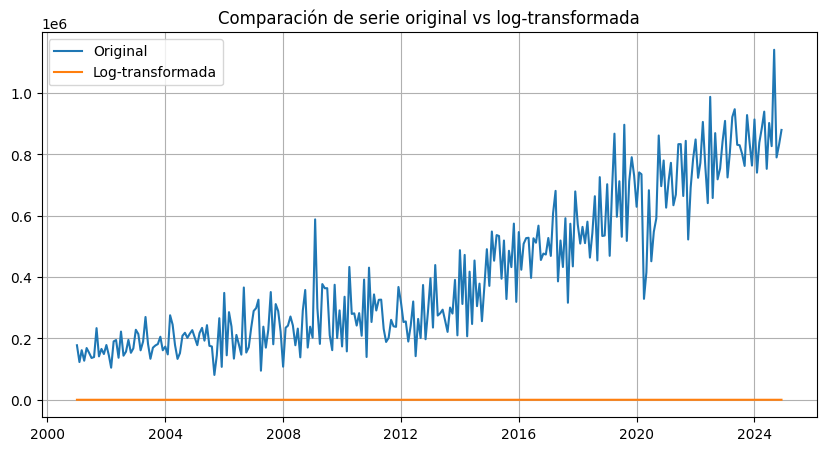

In [31]:
importaciones_regular_ts_log = np.log(importaciones_regular_ts)
plt.figure(figsize=(10, 5))
plt.plot(importaciones_regular_ts, label='Original')
plt.plot(importaciones_regular_ts_log, label='Log-transformada')
plt.title("Comparación de serie original vs log-transformada")
plt.legend()
plt.grid(True)
plt.show()


A través de este análisis gráfico se puede decir que se logro hacer estacionaria la desviación estándar móvil. Por lo que ahora es necesario hacer estacionario a la media movil. Para ello haremos una diferencia e identificar si se logra estacionar. 

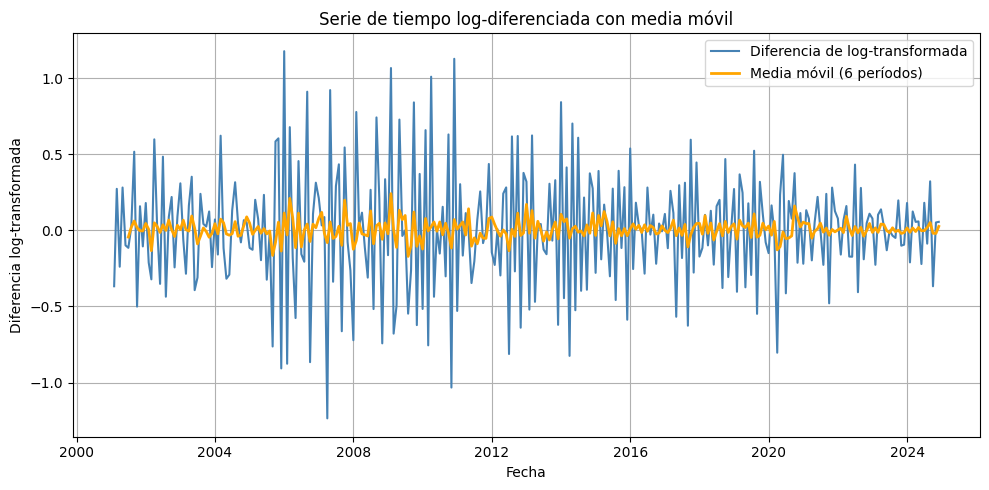

In [32]:
importaciones_regular_ts_log_diff = importaciones_regular_ts_log.diff().dropna()

media_movil = importaciones_regular_ts_log_diff.rolling(window=6).mean()

plt.figure(figsize=(10, 5))
plt.plot(importaciones_regular_ts_log_diff, label='Diferencia de log-transformada', color='steelblue')
plt.plot(media_movil, label='Media móvil (6 períodos)', color='orange', linewidth=2)

plt.title("Serie de tiempo log-diferenciada con media móvil")
plt.xlabel("Fecha")
plt.ylabel("Diferencia log-transformada")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

print('Resultados del Test de Dickey-Fuller para la serie log-diferenciada')
dfTest = adfuller(importaciones_regular_ts_log_diff)
salidaDf = pd.Series(dfTest[0:4], index=[
    'Estadístico de prueba',
    'p-value',
    '# de retardos usados',
    '# de observaciones usadas'
])
for key, value in dfTest[4].items():
    salidaDf[f'Valor crítico ({key})'] = value
salidaDf

Resultados del Test de Dickey-Fuller para la serie log-diferenciada


Estadístico de prueba       -7.860881e+00
p-value                      5.288333e-12
# de retardos usados         1.200000e+01
# de observaciones usadas    2.740000e+02
Valor crítico (1%)          -3.454444e+00
Valor crítico (5%)          -2.872147e+00
Valor crítico (10%)         -2.572422e+00
dtype: float64

Luego de realizar la transformación logarítmica y la diferenciación ya se obtiene que la serie es estacionaria tanto en la media como en la desviación estándar. 

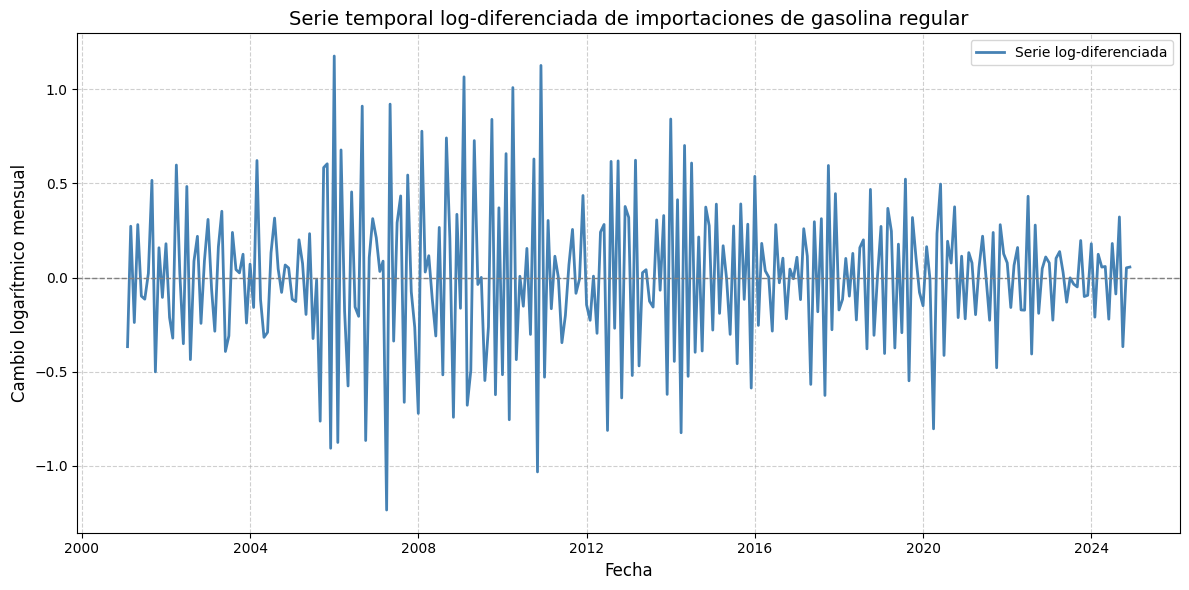

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(importaciones_regular_ts_log_diff, label='Serie log-diferenciada', color='steelblue', linewidth=2)

# Mejoras visuales
plt.title('Serie temporal log-diferenciada de importaciones de gasolina regular', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cambio logarítmico mensual', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # línea base
plt.legend()
plt.tight_layout()
plt.show()

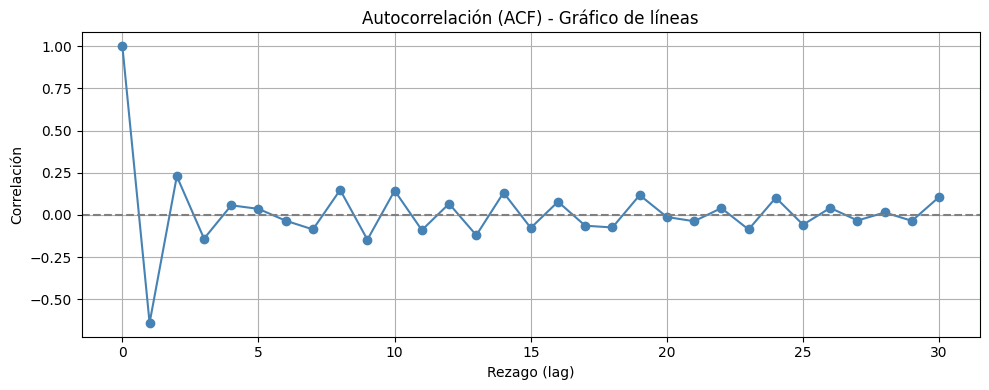

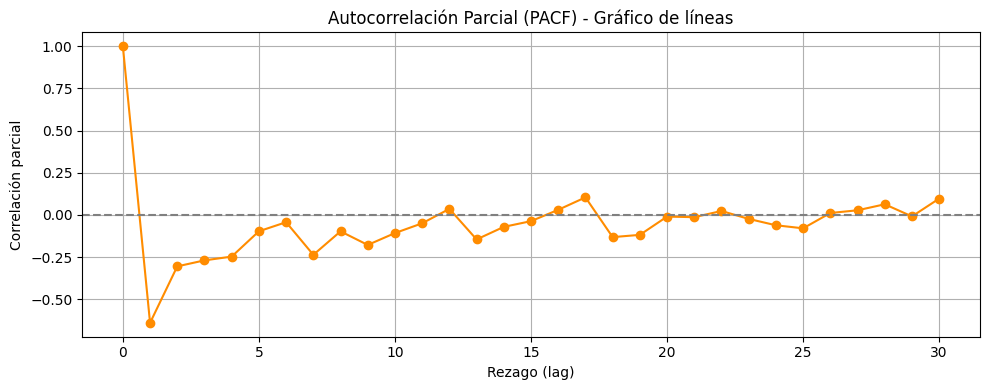

In [39]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import matplotlib.pyplot as plt

# Asegúrate de no tener nulos
serie = importaciones_regular_ts_log_diff.dropna()

# Calcular valores de ACF y PACF
acf_vals = acf(serie, nlags=30)
pacf_vals = pacf(serie, nlags=30, method='ywm')

# Eje de lags
lags = np.arange(len(acf_vals))

# Graficar ACF
plt.figure(figsize=(10, 4))
plt.plot(lags, acf_vals, marker='o', linestyle='-', color='steelblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Autocorrelación (ACF) - Gráfico de líneas')
plt.xlabel('Rezago (lag)')
plt.ylabel('Correlación')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar PACF
plt.figure(figsize=(10, 4))
plt.plot(lags, pacf_vals, marker='o', linestyle='-', color='darkorange')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Autocorrelación Parcial (PACF) - Gráfico de líneas')
plt.xlabel('Rezago (lag)')
plt.ylabel('Correlación parcial')
plt.grid(True)
plt.tight_layout()
plt.show()


De las gráficas de autocorrelación y autocorrelación parcial se puede intuir que se puede tratar de un modelo teórico ARIMA con parámetros p y q variando entre 1 y 2. Por lo que se propondrán 4 modelos y se comparará entre ellos para identificar cual es el más apropiado.

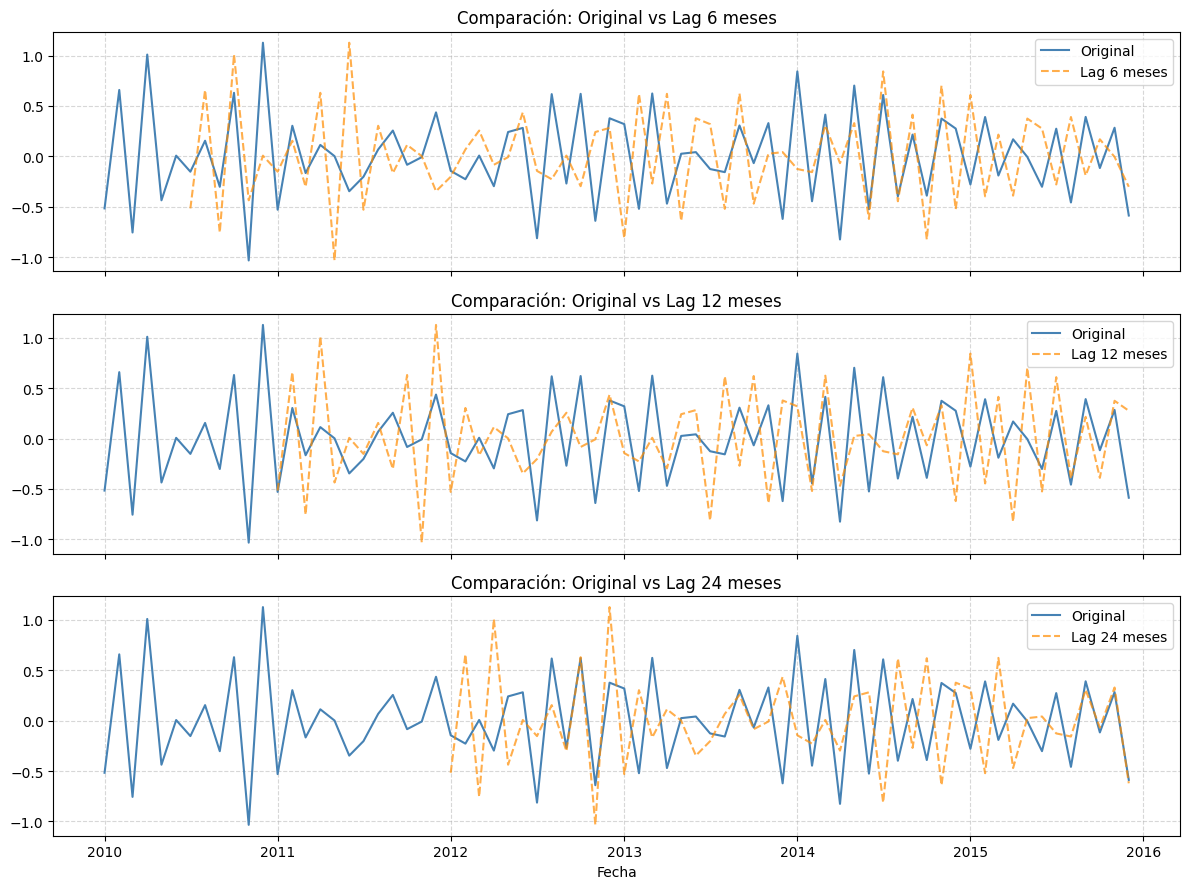

In [48]:
# Lags a mostrar
lags = [6, 12, 24]

# Recorte visual para que no se sature
serie_base = importaciones_regular_ts_log_diff['2010':'2015']

fig, axes = plt.subplots(len(lags), 1, figsize=(12, 9), sharex=True)

for i, lag in enumerate(lags):
    axes[i].plot(serie_base, label='Original', color='steelblue')
    axes[i].plot(serie_base.shift(lag), label=f'Lag {lag} meses', color='darkorange', linestyle='--', alpha=0.7)
    axes[i].set_title(f'Comparación: Original vs Lag {lag} meses')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


En las gráficas se puede notar cierta estacionalidad para un rezago de 12 meses. Por lo que se generarán modelos considerando la estacionalidad. Sin embargo, sería interesante, dado que tampoco es muy claro intentar, generar un modelo sin estacionalidad.

In [49]:
serie = importaciones_regular_ts_log.dropna()

# Modelos estacionales SARIMA(p,1,q)(P,1,Q,12)
modelos = {}

# SARIMA(1,1,1)(1,1,1,12)
modelos['SARIMA_111_111'] = SARIMAX(serie, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)

# SARIMA(2,1,1)(2,1,1,12)
modelos['SARIMA_211_211'] = SARIMAX(serie, order=(2,1,1), seasonal_order=(2,1,1,12)).fit(disp=False)

# SARIMA(1,1,2)(1,1,2,12)
modelos['SARIMA_112_112'] = SARIMAX(serie, order=(1,1,2), seasonal_order=(1,1,2,12)).fit(disp=False)

# SARIMA(2,1,2)(2,1,2,12)
modelos['SARIMA_212_212'] = SARIMAX(serie, order=(2,1,2), seasonal_order=(2,1,2,12)).fit(disp=False)

# Modelo ARIMA (sin componente estacional)
modelos['ARIMA_212'] = SARIMAX(serie, order=(2,1,2), seasonal_order=(0,0,0,0)).fit(disp=False)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as 

In [50]:
# Crear tabla de comparación
resultados = []

for nombre, modelo in modelos.items():
    resultados.append({
        'Modelo': nombre,
        'AIC': modelo.aic,
        'BIC': modelo.bic,
        'LogLik': modelo.llf
    })

# Mostrar en un DataFrame ordenado por AIC
import pandas as pd

comparacion = pd.DataFrame(resultados).sort_values(by='AIC').reset_index(drop=True)
print(comparacion)


           Modelo         AIC         BIC     LogLik
0       ARIMA_212   49.630902   67.910861 -19.815451
1  SARIMA_112_112   91.294743  116.586640 -38.647372
2  SARIMA_212_212   94.850254  127.368407 -38.425127
3  SARIMA_211_211  154.384013  179.675910 -70.192006
4  SARIMA_111_111  181.067236  199.132877 -85.533618


Como se intuía, resulta ser el modelo sin estacionalidad el que tiene un mejor desempeño. Por lo que ahora se generarán modelos sin la componente estacional para determinar cuál es mejor. 

In [51]:
# Asegúrate de tener la serie sin nulos y con frecuencia mensual
serie = importaciones_regular_ts_log.dropna()

# Diccionario para guardar modelos
modelos_arima = {}

# Probar combinaciones de p y q entre 1 y 2
for p in [1, 2]:
    for q in [1, 2]:
        nombre = f'ARIMA_{p}1{q}'
        try:
            modelo = SARIMAX(serie, order=(p, 1, q), seasonal_order=(0, 0, 0, 0))
            resultados = modelo.fit(disp=False)
            modelos_arima[nombre] = resultados
        except Exception as e:
            print(f"Error al ajustar {nombre}: {e}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
resultados_arima = []

for nombre, modelo in modelos_arima.items():
    resultados_arima.append({
        'Modelo': nombre,
        'AIC': modelo.aic,
        'BIC': modelo.bic,
        'LogLik': modelo.llf
    })


comparacion_arima = pd.DataFrame(resultados_arima).sort_values(by='AIC').reset_index(drop=True)
print(comparacion_arima)


      Modelo         AIC         BIC     LogLik
0  ARIMA_112   49.289663   63.913631 -20.644832
1  ARIMA_212   49.630902   67.910861 -19.815451
2  ARIMA_211  111.792495  126.416462 -51.896247
3  ARIMA_111  137.151739  148.119715 -65.575870


A partir de esta comparación de modelos pueden ser utilizados el modelo ARIMA_112 o el modelo ARIMA212, la diferencia entre ellos es mínima por lo que a la hora de generar modelos es altamente probable que no haya mucha diferencia. Sin embargo al final un modelo más simple puede generalizar mejor, por ello se recomienda utilizar un modelo ARIMA_112 para una predicción futura.